In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                                      download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                                     download=True, transform=transform)

Files already downloaded and verified


In [13]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                                                        shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                                                        shuffle=False, num_workers=4)

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [24]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        opt.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        opt.step()
        
        running_loss = loss.item()
        if i % 100 == 0:
            print(i, running_loss)

0 2.300351619720459
100 2.3005974292755127
200 2.285353660583496
300 1.2422239780426025
400 2.076258659362793
500 2.2051150798797607
600 2.3468079566955566
700 2.201366662979126
800 2.3830208778381348
900 1.724401593208313
1000 2.4145936965942383
1100 2.0973663330078125
1200 2.6074209213256836
1300 3.0675582885742188
1400 1.8559527397155762
1500 2.5276219844818115
1600 1.7691426277160645
1700 2.243441581726074
1800 2.343740463256836
1900 1.7679316997528076
2000 1.603598713874817
2100 2.05200457572937
2200 1.784950852394104
2300 2.566880702972412
2400 2.049386739730835
2500 1.824059247970581
2600 1.563169240951538
2700 1.5707663297653198
2800 2.1996560096740723
2900 1.888573169708252
3000 1.9426004886627197
3100 1.9103107452392578
3200 1.647467851638794
3300 2.0346436500549316
3400 2.6550610065460205
3500 1.7685017585754395
3600 1.9313359260559082
3700 1.7486884593963623
3800 1.0458674430847168
3900 1.7736012935638428
4000 2.126124382019043
4100 2.0798356533050537
4200 2.054902315139770

 ship  bird truck  ship


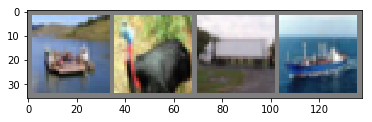

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# functions to show an image

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x109f62f98>>
Traceback (most recent call last):
  File "/Users/tomoaki/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/Users/tomoaki/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/Users/tomoaki/anaconda3/lib/python3.6/multiprocessing/queues.py", line 345, in get
    return _ForkingPickler.loads(res)
  File "/Users/tomoaki/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 86, in rebuild_storage_filename
    storage = cls._new_shared_filename(manager, handle, size)
RuntimeError: Interrupted system call at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/libshm/core.cpp:125


GroundTruth:   frog truck truck  deer


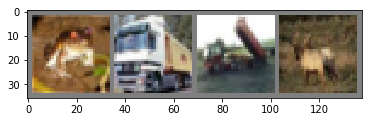

In [27]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [30]:
images.shape

torch.Size([4, 3, 32, 32])

In [21]:
torch.randn((1)).item()

-1.4110370874404907

In [22]:
a = torch.ones((5, 3 ))

In [23]:
a.numpy()

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32)

In [24]:
a.add_(1)

tensor([[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]])

In [25]:
a

tensor([[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]])

In [27]:
torch.cuda.is_available()

False

In [28]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
print(y)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


In [29]:
print(y.grad_fn)

In [32]:
output = y.mean()

In [33]:
output.backward()

In [34]:
print(x.grad)

tensor([[ 0.2500,  0.2500],
        [ 0.2500,  0.2500]])


In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5* 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def flatten(self, x):
        batch = x.shape[0]
        return x.view(batch, -1)

In [69]:
input = torch.randn(1, 1, 32, 32)
print(input)
net = Net()
out = net(input)
print(out)

tensor([[[[-0.2387, -0.7475, -1.5835,  ..., -0.5566,  0.0177, -1.2247],
          [-1.2148, -0.5199,  0.4911,  ...,  0.6386, -0.3591, -0.8057],
          [ 0.7589,  0.2992, -1.3232,  ..., -0.0560,  0.7766,  0.0258],
          ...,
          [-0.9081,  2.1364,  0.5103,  ...,  0.3776,  0.4517, -2.1543],
          [-0.4261, -0.4991,  1.5028,  ..., -0.1469,  0.2324,  0.0541],
          [ 0.7942, -0.0610, -1.7792,  ..., -1.7201, -0.4002,  0.1224]]]])
tensor([[-0.1372,  0.1071,  0.0792,  0.1259,  0.1652,  0.1379, -0.0169,
          0.0683, -0.0822,  0.1799]])


In [71]:
target = torch.arange(1, 11)
target = target.view(1, -1)
criterion = nn.MSELoss()
loss = criterion(out, target)

In [72]:
loss.backward()

In [74]:
net.conv1.bias.grad

tensor([-0.0861, -0.1527, -0.0674, -0.0507, -0.0462, -0.1045])

In [78]:
for f in net.parameters():
    f.data.sub_(f.grad.data * 0.1)

In [105]:
import torch.optim as optim
input = torch.randn(1, 1, 32, 32)
print(input)
net = Net()
out = net(input)
print(out)
criteria = nn.MSELoss()
loss = criteria(out, target)
optimizer = optim.SGD(net.parameters(), lr=1e-1)
optimizer.zero_grad()
loss.backward()
optimizer.step()
print(loss.data)

tensor([[[[ 1.9302, -0.5214, -1.2416,  ...,  1.3622,  0.4657, -1.8537],
          [ 1.1189,  0.0226,  0.7067,  ..., -0.4436, -0.3912, -0.5147],
          [ 0.6122, -0.0849,  1.4010,  ...,  1.5727,  0.1548,  1.3952],
          ...,
          [-0.7508, -1.1201, -1.1210,  ..., -1.1637,  2.2957,  1.2298],
          [-1.3515, -0.5701, -0.3382,  ..., -0.2310,  0.3797, -0.7245],
          [-0.8234, -0.3266, -1.3854,  ..., -0.5196,  1.0437,  1.8604]]]])
tensor([[ 0.0863,  0.0024, -0.1141,  0.2085,  0.1393, -0.0260, -0.0285,
          0.0567,  0.1407, -0.0395]])
tensor(38.0612)


In [106]:
optimizer.zero_grad()
loss.backward()
optimizer.step()
print(loss.data)

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.